In [4]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Predict Clicked Ads Customer Classification by using Machine Learning

In [5]:
df = pd.read_csv('Clicked Ads Dataset.csv')

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


Based on a quick glance, the data has 1000 rows and 11 columns with 4 columns with a missing values, namely 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', and 'Male'. 

In [7]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [8]:
# Change the data type from object to datetime for column 'Timestamp'

df['Timestamp'] = pd.to_datetime(df['Timestamp'],  dayfirst=False )

In [9]:
# Group columns based on data types
numer_var = ['Daily Time Spent on Site', 'Age','Area Income','Daily Internet Usage']
cat_var = ['city','province','category']
bool_var = ['Male','Clicked on Ad']
timestamp_var = ['Timestamp']

In [10]:
df_bool = df[bool_var]

for i in df_bool:
    print("-" * 30) 
    print(f'Columns: {i}')
    print(df_bool[i].value_counts())
print("=" * 30) 

------------------------------
Columns: Male
Male
Perempuan    518
Laki-Laki    479
Name: count, dtype: int64
------------------------------
Columns: Clicked on Ad
Clicked on Ad
No     500
Yes    500
Name: count, dtype: int64


In [11]:
df['province'].value_counts()

province
Daerah Khusus Ibukota Jakarta    253
Jawa Barat                       210
Jawa Timur                        90
Banten                            76
Jawa Tengah                       53
Sumatra Utara                     48
Sumatra Selatan                   42
Kepulauan Riau                    34
Kalimantan Timur                  34
Sulawesi Selatan                  33
Lampung                           29
Kalimantan Selatan                23
Riau                              23
Bali                              21
Sumatra Barat                     19
Kalimantan Barat                  12
Name: count, dtype: int64

In [12]:
df['province'].nunique()

16

Customers are located in 16 province with most customers located in DKI Jakarta and Jawa Barat.

In [13]:
df['city'].value_counts()

city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: count, dtype: int64

In [14]:
df['city'].nunique()

30

The customers are located in a total of 30 cities with Surabaya and Bandung as the city most customers located. 

In [15]:
df['category'].value_counts()

category
Otomotif      112
House         109
Health        104
Fashion       102
Food           99
Furniture      98
Travel         98
Electronic     97
Finance        91
Bank           90
Name: count, dtype: int64

In [16]:
df['category'].nunique()

10

The category most selected by the customers is Otomotif, followed by House, Health and Fashion. The least selected categories are Electronic, Finance, and Bank. 

In [17]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Timestamp
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000,1000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620,2016-04-10 10:33:36.840000
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000,2016-01-01 02:52:00
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000,2016-02-18 02:55:15
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000,2016-04-07 17:27:00
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000,2016-05-31 03:18:00
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000,2016-07-24 00:22:00
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142,NaN


- Age: 19-61 years old, mean (36) > median (35), slightly positive distribution
- Area Income: in the range of 97.975.500 -  556.393.600 million, median (399.068.320) > mean (384.864.670), slightly negative distribution
- Daily Time Spent on Site: min 32.6 to 91 mins, median (68) > mean (65), slightly negative distribution
- Daily Internet Usage: 105-267 gb?, median (183) > mean (180), slightly negative distribution

## Univariate Analysis

### Numerical 

In [18]:
numer_var

['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

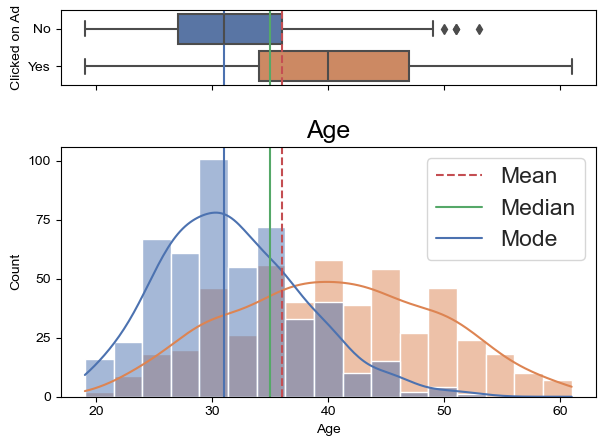

In [19]:
# Age
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df['Age'].mean()
median=df['Age'].median()
mode=df['Age'].mode().values[0]

age = sns.boxplot(data=df, x="Age", y="Clicked on Ad", ax=ax_box, order= df["Clicked on Ad"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Age", hue='Clicked on Ad',ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.title('Age')
plt.tight_layout()

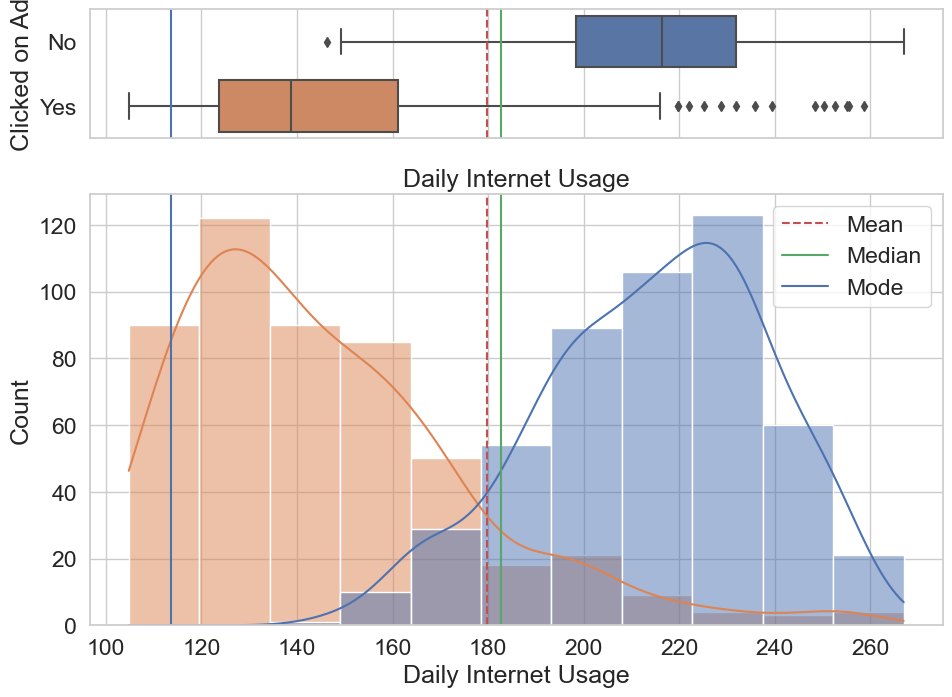

In [20]:
# Daily Internet Usage
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df['Daily Internet Usage'].mean()
median=df['Daily Internet Usage'].median()
mode=df['Daily Internet Usage'].mode().values[0]

age = sns.boxplot(data=df, x="Daily Internet Usage", y="Clicked on Ad", ax=ax_box, order= df["Clicked on Ad"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Daily Internet Usage",hue='Clicked on Ad', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.title('Daily Internet Usage');

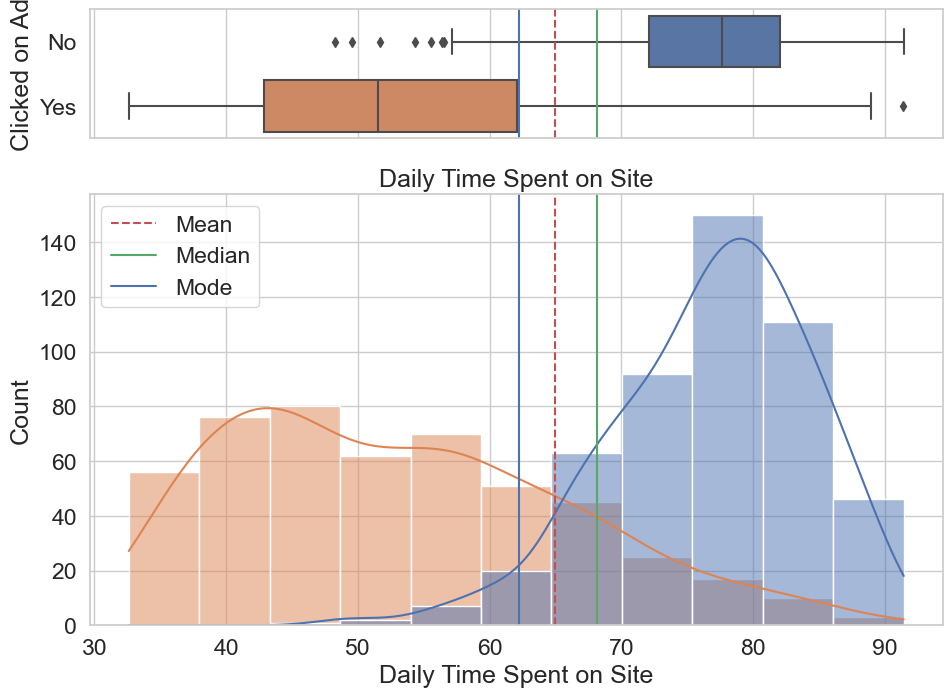

In [21]:
# Daily Time Spent on Site
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df['Daily Time Spent on Site'].mean()
median=df['Daily Time Spent on Site'].median()
mode=df['Daily Time Spent on Site'].mode().values[0]

age = sns.boxplot(data=df, x="Daily Time Spent on Site", y="Clicked on Ad", ax=ax_box, order= df["Clicked on Ad"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Daily Time Spent on Site",hue='Clicked on Ad', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.title('Daily Time Spent on Site');

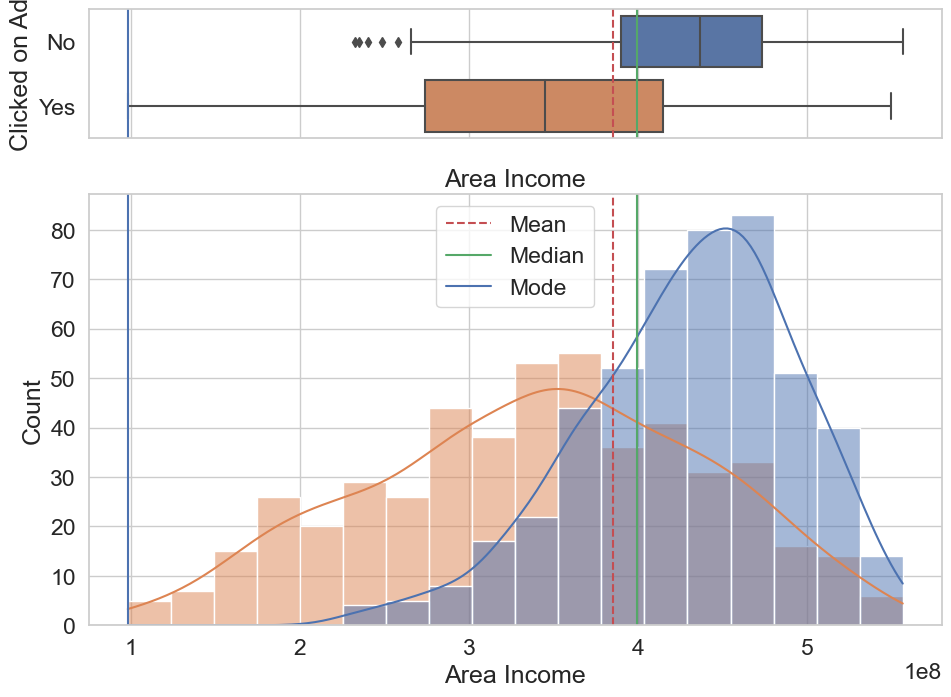

In [22]:
# Area Income
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df['Area Income'].mean()
median=df['Area Income'].median()
mode=df['Area Income'].mode().values[0]

age = sns.boxplot(data=df, x="Area Income", y="Clicked on Ad", ax=ax_box, order= df["Clicked on Ad"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="Area Income",hue='Clicked on Ad', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.title('Area Income');

### Categorical

In [23]:
cat_var

['city', 'province', 'category']

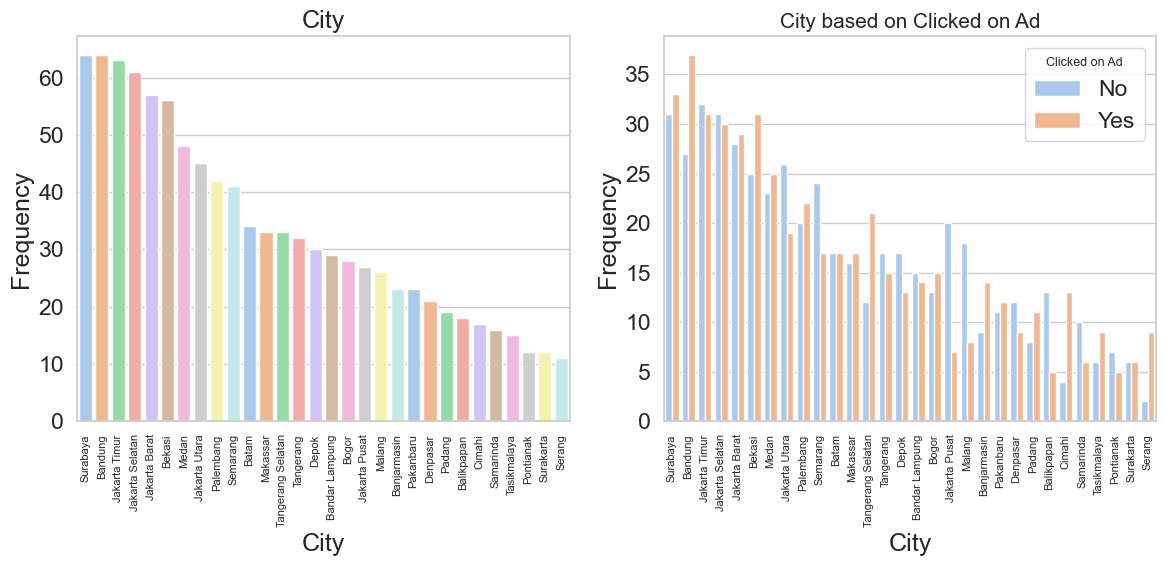

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='city', data=df, palette='pastel', order=df["city"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('City')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('City')

sns.countplot(x='city', data=df, hue='Clicked on Ad', palette='pastel', order=df["city"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('City')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Clicked on Ad', title_fontsize=9, loc='upper right')
axes[1].set_title('City based on Clicked on Ad', fontsize=15)

plt.tight_layout()

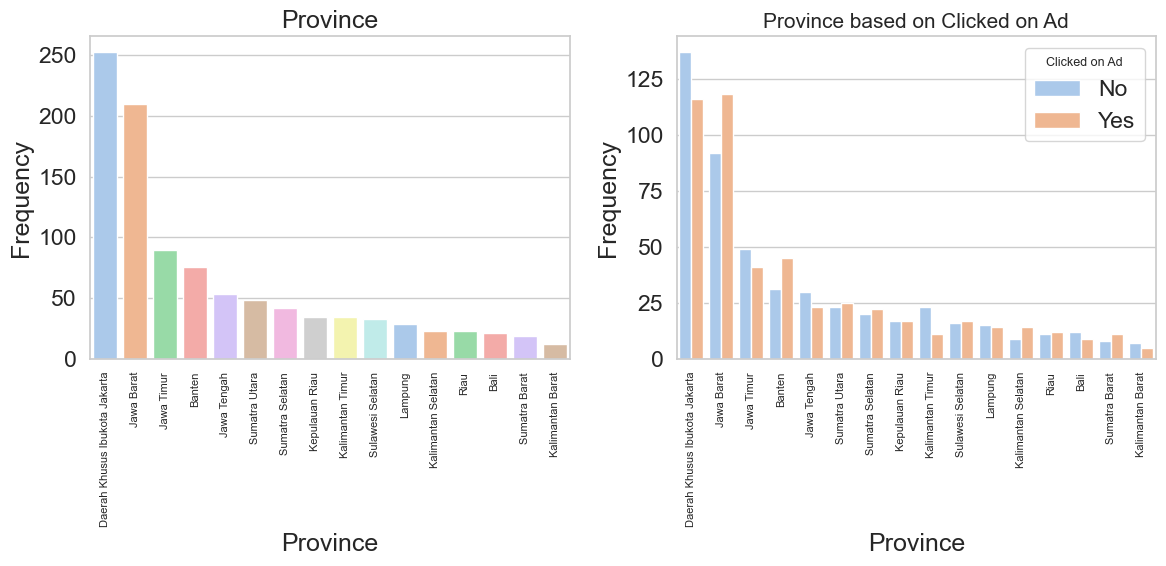

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='province', data=df, palette='pastel', order=df["province"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('Province')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Province')

sns.countplot(x='province', data=df, hue='Clicked on Ad', palette='pastel', order=df["province"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('Province')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Clicked on Ad', title_fontsize=9, loc='upper right')
axes[1].set_title('Province based on Clicked on Ad', fontsize=15)

plt.tight_layout()

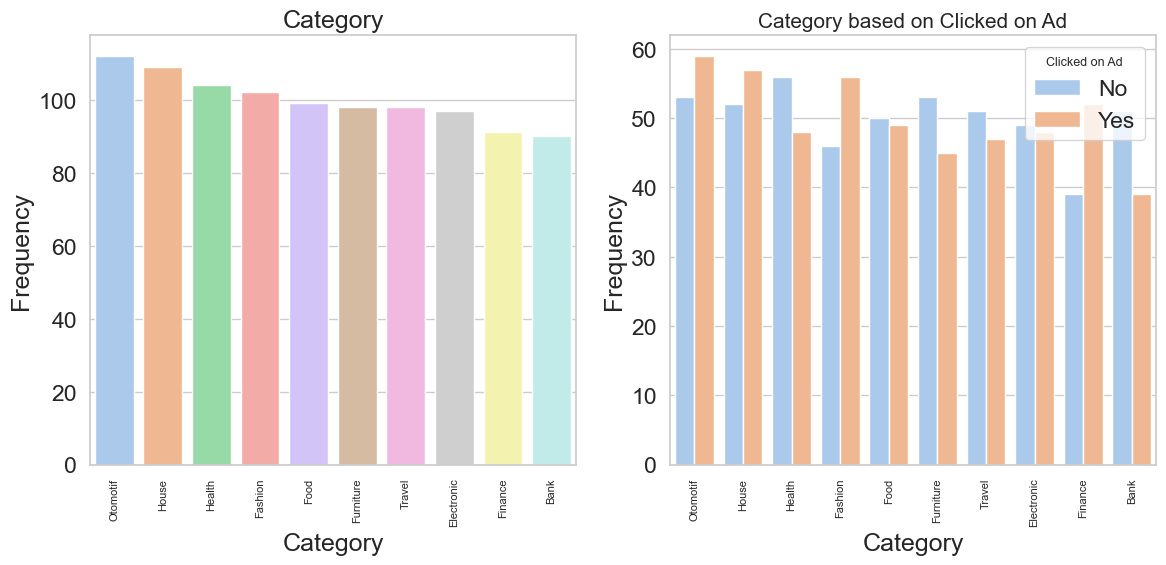

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='category', data=df, palette='pastel', order=df["category"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Category')

sns.countplot(x='category', data=df, hue='Clicked on Ad', palette='pastel', order=df["category"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Clicked on Ad', title_fontsize=9, loc='upper right')
axes[1].set_title('Category based on Clicked on Ad', fontsize=15)

plt.tight_layout()

In [27]:
bool_var

['Male', 'Clicked on Ad']

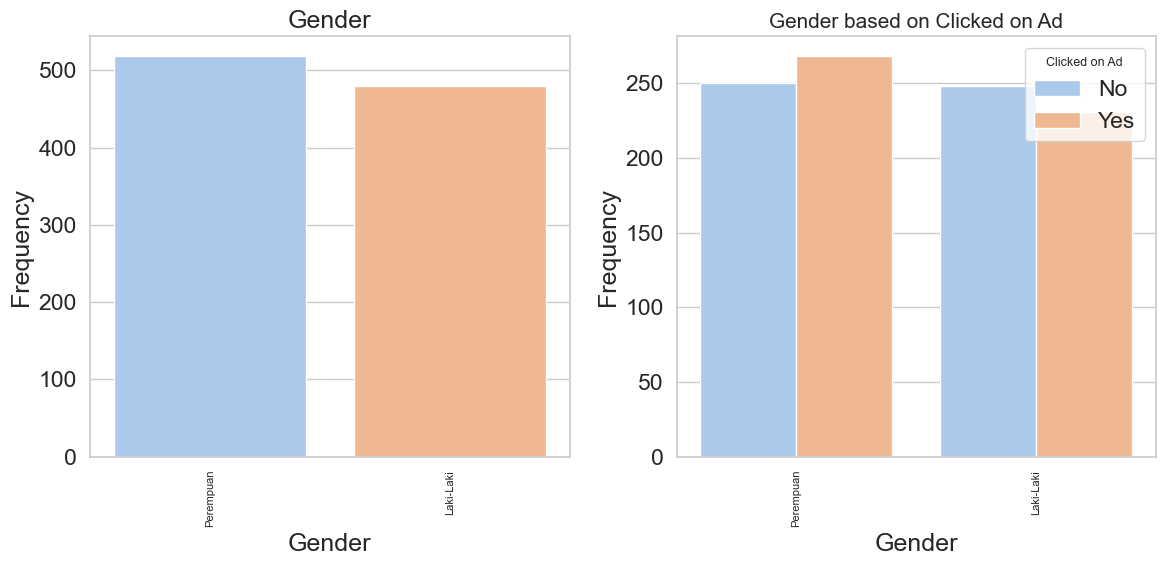

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='Male', data=df, palette='pastel', order=df["Male"].value_counts().index, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='major', labelsize=8)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Gender')

sns.countplot(x='Male', data=df, hue='Clicked on Ad', palette='pastel', order=df["Male"].value_counts().index, ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='major', labelsize=8)
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Clicked on Ad', title_fontsize=9, loc='upper right')
axes[1].set_title('Gender based on Clicked on Ad', fontsize=15)

plt.tight_layout()

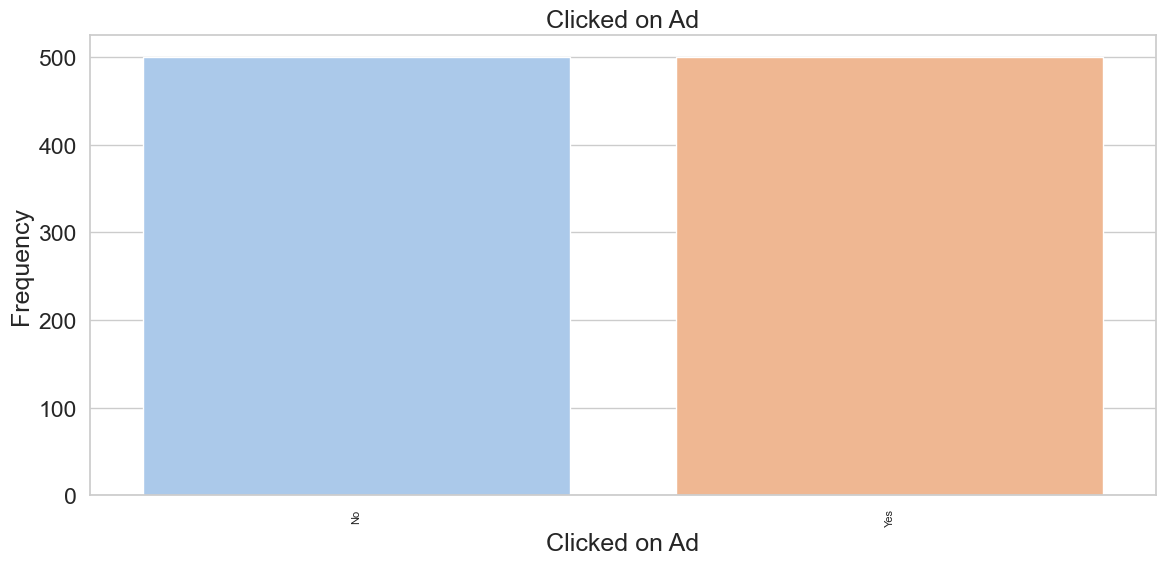

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

sns.countplot(x='Clicked on Ad', data=df, palette='pastel', order=df["Clicked on Ad"].value_counts().index, ax=ax)
ax.set_xlabel('Clicked on Ad')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', which='major', labelsize=8)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Clicked on Ad')

plt.tight_layout()

## Bivariate Analysis

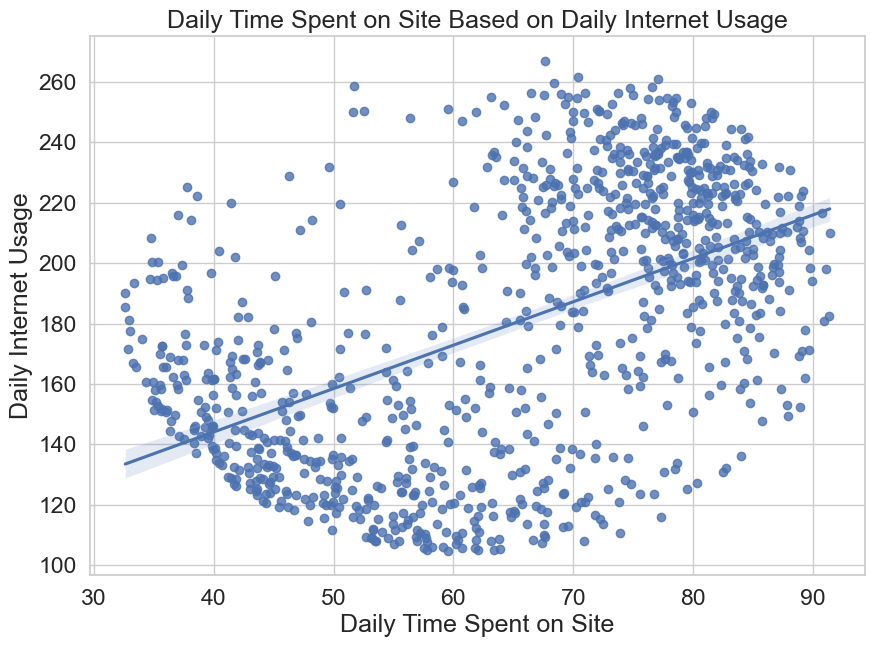

In [30]:
# Daily Time Spent on Site Based on Daily Internet Usage

plt.figure(figsize = (10,7))
sns.regplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data = df)
plt.title('Daily Time Spent on Site Based on Daily Internet Usage')
plt.show()

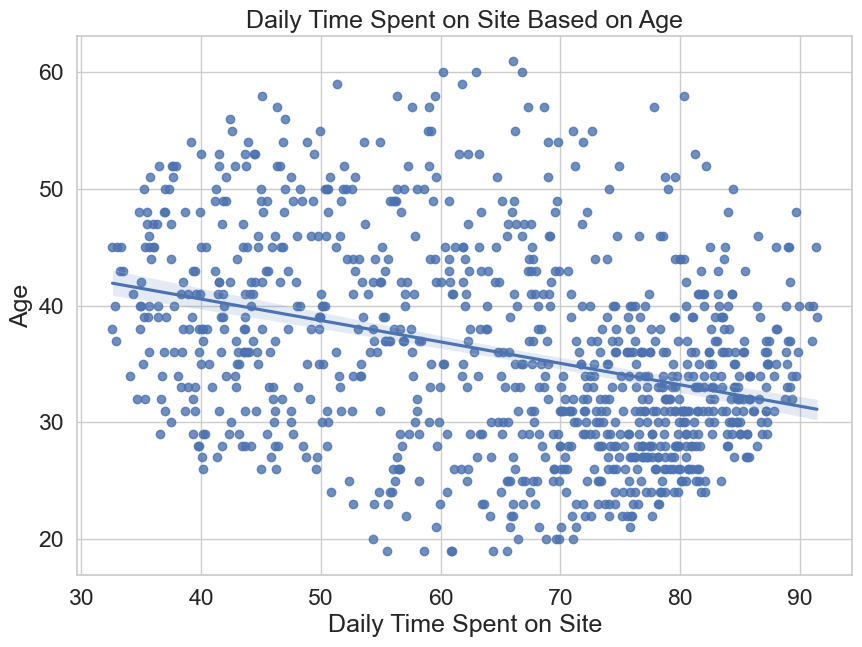

In [31]:
# Daily Time Spent on Site Based on Age

plt.figure(figsize = (10,7))
sns.regplot(x='Daily Time Spent on Site',y='Age',data = df)
plt.title('Daily Time Spent on Site Based on Age')
plt.show()

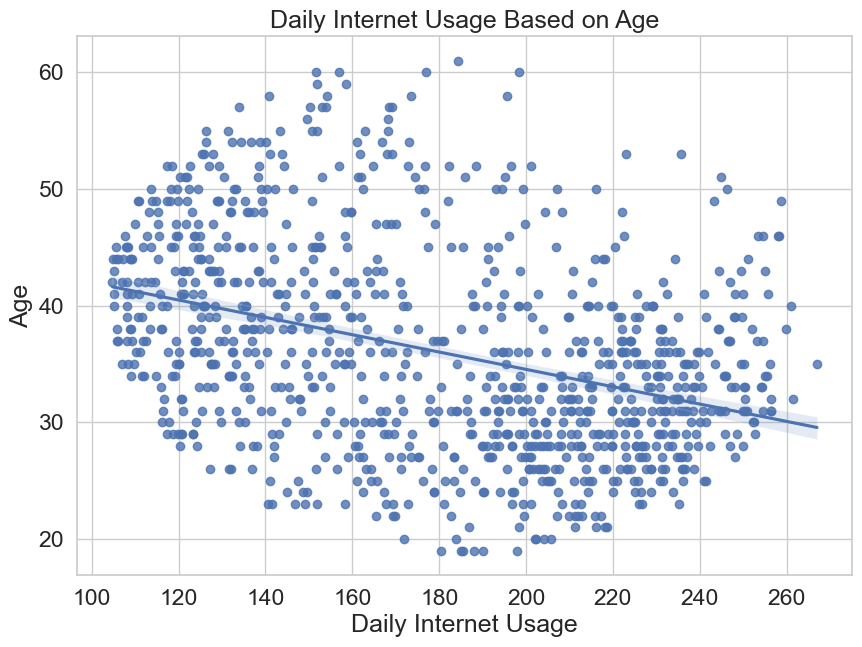

In [32]:
# Daily Internet Usage Based on Age

plt.figure(figsize = (10,7))
sns.regplot(x='Daily Internet Usage',y='Age',data = df)
plt.title('Daily Internet Usage Based on Age')
plt.show()

## Multivariate Analysis

In [33]:
# Drop the first column (Unnamed: 0) as it's irrelevant
df_multivar = df.drop(columns=['Unnamed: 0'])

Text(0.5, 1.0, 'Pearson Correlation')

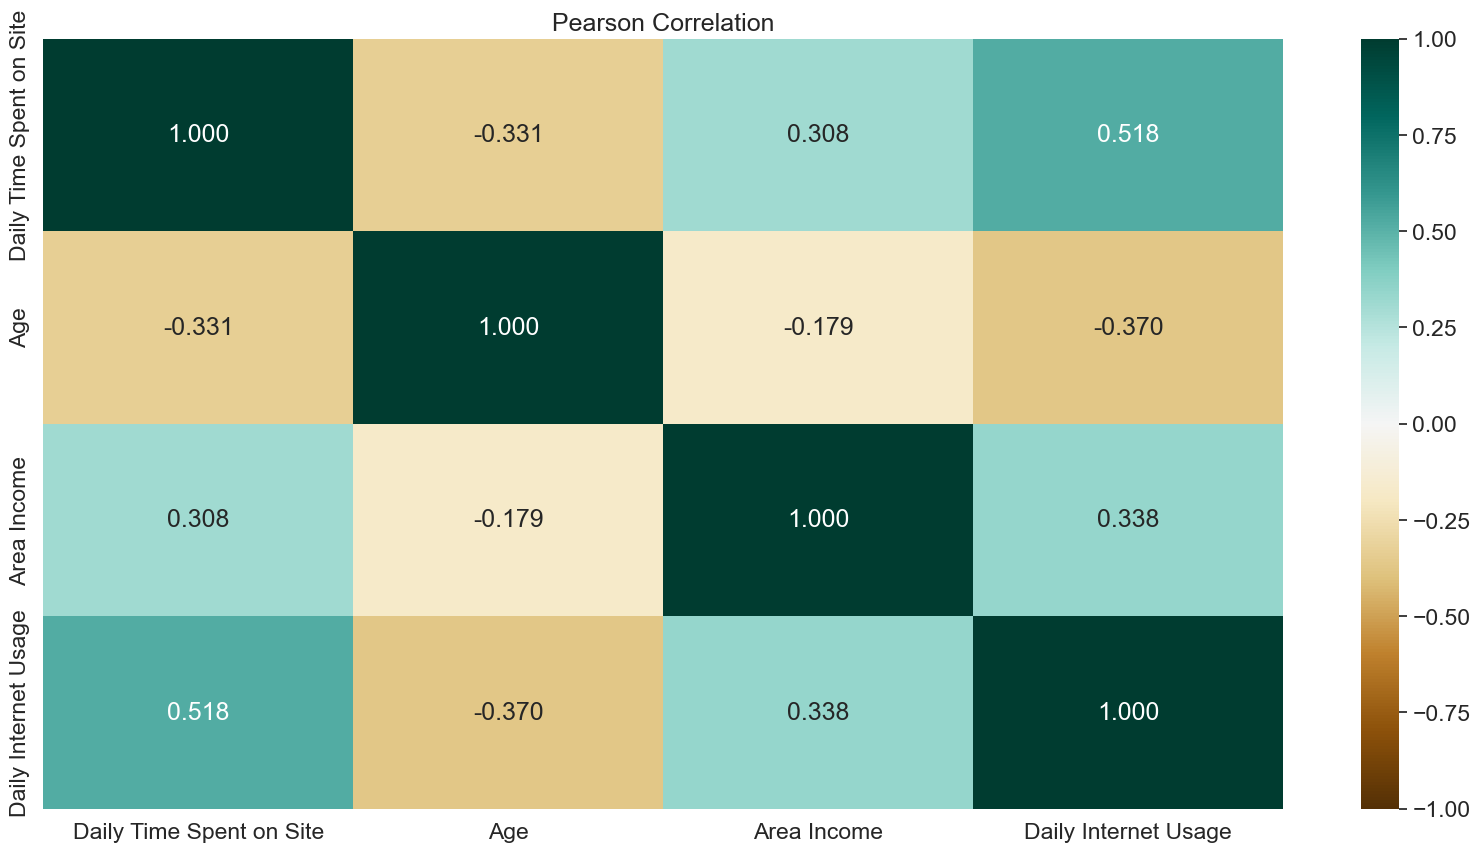

In [34]:
# Pearson correlation
plt.figure(figsize=(20,10))

sns.heatmap(df_multivar.corr(numeric_only=True,method='pearson'),
            fmt='.3f',
            annot=True,
            cmap='BrBG',
            vmin=-1)
plt.title('Pearson Correlation')